In [68]:
# Import the libraries we will be using
import os
import numpy as np
import pandas as pd
import math
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from IPython.display import Image
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas import DataFrame, read_sql
import pandas as pd
import sqlite3
import pickle

In [92]:
con_gov = sqlite3.connect("gov_new_censys.db")
con_zip = sqlite3.connect("zip_new_censys.db")
gov_sql = '''SELECT *
                FROM cert_data
                '''

zip_sql = '''SELECT *
                FROM cert_data
                '''
df_gov = pd.read_sql(gov_sql, con_gov)
df_zip = pd.read_sql(zip_sql, con_zip)
df_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3617 entries, 0 to 3616
Data columns (total 20 columns):
sha256               3617 non-null object
subject_c            3617 non-null object
subject_o            3617 non-null object
subject_cn           3617 non-null object
issuer_c             3617 non-null object
issuer_o             3617 non-null object
issuer_cn            3617 non-null object
signing_algorithm    3617 non-null object
self_signed          3617 non-null int64
key_algorithm        3617 non-null object
val_length           2693 non-null float64
val_start            3617 non-null object
enc_only             3617 non-null int64
cert_sign            3617 non-null int64
key_enc              3617 non-null int64
digi_sign            3617 non-null int64
cont_commit          3617 non-null int64
dec_only             3617 non-null int64
key_agreem           3617 non-null int64
data_enc             3617 non-null int64
dtypes: float64(1), int64(9), object(10)
memory usage: 565.2+

In [30]:
len(df_zip)
df_zip['digi_sign'][0]


1

In [59]:
feature_zip = [0,0,0,0,0,0,0,0,0]
feature_gov = [0,0,0,0,0,0,0,0,0]
total1 =0
total2 =0
for i in range(len(df_zip)):
    if df_zip['digi_sign'][i] == 1:
        feature_zip[0] +=1
    if df_zip['self_signed'][i] == 1:
        feature_zip[1] +=1
    if df_zip['enc_only'][i] == 1:
        feature_zip[2] +=1
    if df_zip['cert_sign'][i] == 1:
        feature_zip[3] +=1
    if df_zip['key_enc'][i] == 1:
        feature_zip[4] +=1
    if df_zip['cont_commit'][i] == 1:
        feature_zip[5] +=1
    if df_zip['dec_only'][i] == 1:
        feature_zip[6] +=1
    if df_zip['key_agreem'][i] == 1:
        feature_zip[7] +=1
    if df_zip['data_enc'][i] ==1:
        feature_zip[8] +=1
    total1+=1
for i in range(len(df_gov)):
    if df_gov['digi_sign'][i] == 1:
        feature_gov[0] +=1
    if df_gov['self_signed'][i] == 1:
        feature_gov[1] +=1
    if df_gov['enc_only'][i] == 1:
        feature_gov[2] +=1
    if df_gov['cert_sign'][i] == 1:
        feature_gov[3] +=1
    if df_gov['key_enc'][i] == 1:
        feature_gov[4] +=1
    if df_gov['cont_commit'][i] == 1:
        feature_gov[5] +=1
    if df_gov['dec_only'][i] == 1:
        feature_gov[6] +=1
    if df_gov['key_agreem'][i] == 1:
        feature_gov[7] +=1
    if df_gov['data_enc'][i] ==1:
        feature_gov[8] +=1
    total2+=1
print total1
print total2
print feature_zip
print feature_gov
percent_zip = []
percent_gov = []
perc_zip = lambda x: (x*100)/total1
perc_gov = lambda x: (x*100)/total2
for x in feature_zip:
    percent_zip.append(perc_zip(x)) 
    
for x in feature_gov: 
    percent_gov.append(perc_gov(x))
    
print percent_zip
print percent_gov
#total2

3617
10000
[2563, 1016, 0, 23, 1877, 48, 0, 38, 48]
[8758, 1336, 0, 814, 7678, 479, 0, 97, 304]
[70, 28, 0, 0, 51, 1, 0, 1, 1]
[87, 13, 0, 8, 76, 4, 0, 0, 3]


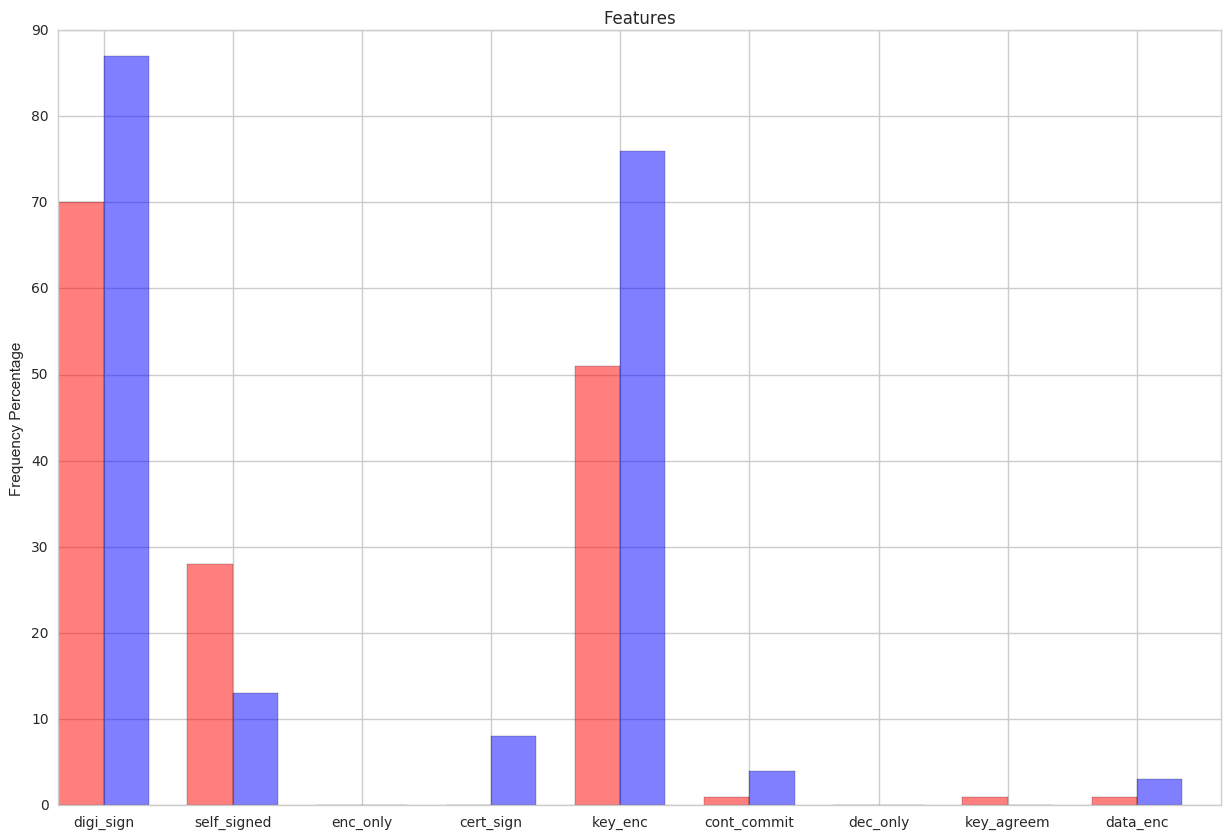

In [66]:
objects = ('digi_sign', 'self_signed', 'enc_only', 'cert_sign', 'key_enc', 'cont_commit','dec_only','key_agreem','data_enc')
y_pos = np.arange(len(objects))
bar_width = 0.35
fig,ax = plt.subplots(figsize=(15,10))
#fig,ax = plt.subplots()
zip_plt = plt.bar(y_pos, percent_zip, bar_width, alpha=0.5, color='r',label = "zip")
gov_plt = plt.bar(y_pos+bar_width, percent_gov, bar_width, alpha=0.5, color='b',label = "gov")
plt.xticks(y_pos+bar_width, objects)
plt.ylabel('Frequency Percentage')
plt.title('Features')
plt.figure(figsize=(50,10))
#plt.tight_layout()
plt.show()

In [89]:
with open("df_combined.pickle") as pickled_file:
    your_df_name = pickle.load(pickled_file)
df_gov = your_df_name[:10000]
df_zip = your_df_name[10000:]
#df_zip['signing_algorithm_nums']
df_zip.index = range(3617)
df_zip.signing_algorithm_nums

0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       1
9       1
10      1
11      1
12      1
13      3
14      3
15      3
16      1
17      3
18      1
19      3
20      3
21      1
22      3
23      3
24      3
25      3
26      1
27      1
28      3
29      1
       ..
3587    1
3588    1
3589    1
3590    1
3591    1
3592    1
3593    1
3594    1
3595    1
3596    1
3597    1
3598    3
3599    3
3600    3
3601    3
3602    3
3603    3
3604    3
3605    3
3606    3
3607    3
3608    3
3609    3
3610    3
3611    3
3612    3
3613    3
3614    3
3615    3
3616    3
Name: signing_algorithm_nums, dtype: int64

In [91]:
signing_algorithm_nums_zip =[]
key_algorithm_nums_zip = []
subject_c_nums_zip =[]
subject_o_nums_zip = []
issuer_c_nums_zip = []
issuer_o_nums_zip = []
subject_cn_nums_zip = []
issuer_cn_nums_zip = []

signing_algorithm_nums_gov = []
key_algorithm_nums_gov =[]
subject_c_nums_gov = []
subject_o_nums_gov = []
issuer_c_nums_gov = []
issuer_o_nums_gov = []
subject_cn_nums_gov = []
issuer_cn_nums_gov = []

feature_zip = [0,0,0,0,0,0,0,0]
feature_gov = [0,0,0,0,0,0,0,0]
total1 =0
total2 =0
k = 0
for i in range(k,k+len(df_zip)):
    signing_algorithm_nums_zip[df_zip['signing_algorithm_nums'][i]] +=1
    key_algorithm_nums_zip[df_zip['key_algorithm_nums'][i]] +=1
    subject_c_nums_zip[df_zip['subject_c_nums'][i]] +=1
    subject_o_nums_zip[df_zip['subject_o_nums'][i]] +=1
    issuer_c_nums_zip[df_zip['issuer_c_nums'][i]] +=1
    issuer_o_nums_zip[df_zip['issuer_o_nums'][i]] +=1
    subject_cn_nums_zip[df_zip['subject_cn_nums'][i]] +=1
    issuer_cn_nums_zip[df_zip['issuer_cn_nums'][i]] +=1
    total+=1
    
for i in range(len(df_gov)):
    signing_algorithm_nums_gov[df_gov['signing_algorithm_nums'][i]] +=1
    key_algorithm_nums_gov[df_gov['key_algorithm_nums'][i]] +=1
    subject_c_nums_gov[df_gov['subject_c_nums'][i]] +=1
    subject_o_nums_gov[df_gov['subject_o_nums'][i]] +=1
    issuer_c_nums_gov[df_gov['issuer_c_nums'][i]] +=1
    issuer_o_nums_gov[df_gov['issuer_o_nums'][i]] +=1
    subject_cn_nums_gov[df_gov['subject_cn_nums'][i]] +=1
    issuer_cn_nums_gov[df_gov['issuer_cn_nums'][i]] +=1
    total2+=1
print total1
print total2
print feature_zip
print feature_gov
'''percent_zip = []
percent_gov = []
perc_zip = lambda x: (x*100)/total1
perc_gov = lambda x: (x*100)/total2
for x in feature_zip:
    percent_zip.append(perc_zip(x)) 
    
for x in feature_gov: 
    percent_gov.append(perc_gov(x))
    
print percent_zip
print percent_gov'''

IndexError: list index out of range